# Importing Libraries

In [ ]:
#Data Pre-processing
import numpy as np
import pandas as pd


#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#Handling Warnings
import warnings
warnings.filterwarnings('ignore')

#Text pre-processing
import string
string.punctuation
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

#Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.metrics import classification_report , confusion_matrix
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import VotingClassifier
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Fetching Data

In [ ]:
import pandas as pd
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# File path on Google Drive
file_path1 = '/content/drive/My Drive/Research_Internship/True.csv'
file_path2 = '/content/drive/My Drive/Research_Internship/Fake.csv'

Mounted at /content/drive


In [ ]:
real = pd.read_csv(file_path1)
real['real/fake'] = 'Real'
real.head()

,title,text,subject,date,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [ ]:
fake = pd.read_csv(file_path2)
fake['real/fake'] = 'Fake'
fake.head()

,title,text,subject,date,real/fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [ ]:
data = pd.concat([real,fake],ignore_index=True)
display(data.head())
display(data.tail())

,title,text,subject,date,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


,title,text,subject,date,real/fake
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   real/fake  44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [ ]:
data.shape

(44898, 5)

In [ ]:
data.columns

Index(['title', 'text', 'subject', 'date', 'real/fake'], dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=44898, step=1)

# Pre Processing

In [ ]:
data.isnull().sum()

title        0
text         0
subject      0
date         0
real/fake    0
dtype: int64

In [ ]:
data.drop(['date','subject'],axis=1,inplace=True)
data.head()

,title,text,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Real


In [ ]:
data.rename(columns={'title':'headings'},inplace=True)
data.head()

,headings,text,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Real


In [ ]:
data.duplicated().sum()

5793

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(39105, 3)

In [ ]:
print(data['real/fake'].value_counts())
fig = px.histogram(data,x=data['real/fake'],color="real/fake",text_auto=True,color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(title="real/fake count",xaxis_title="real/fake",yaxis_title="Count")
fig.show()

Real    21197
Fake    17908
Name: real/fake, dtype: int64


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data['content']=data['headings']+" " +data['text']

In [ ]:
port_stem=PorterStemmer()
def stemming(content):
    #replace any non-alphabetic characters in the content variable with a space character
    stemmed_content= re.sub('[^a-zA-Z]',' ',content)
    #Convert all words into lower case letters
    stemmed_content = stemmed_content.lower()
    # Split the words into list
    stemmed_content = stemmed_content.split()
    #generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    # stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    #Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content


In [ ]:
data['content']= data['content'].apply(stemming)

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 4),max_features=5000)
counts = count_vectorizer.fit_transform(data['content'].values)
tfidf = transformer.fit_transform(counts)

In [ ]:
data.drop(['headings','text'],axis=1,inplace=True)
# data=data.iloc[:,[1,0]]
# data['news']=data['news'].map(lambda x:' '.join(re.findall('\w+',x)))
data.head()

,real/fake,content
0,Real,as u s budget fight looms republicans flip the...
1,Real,u s military to accept transgender recruits on...
2,Real,senior u s republican senator let mr mueller d...
3,Real,fbi russia probe helped by australian diplomat...
4,Real,trump wants postal service to charge much more...


In [ ]:
# x = data['content']
y = data['real/fake']


# Splitting Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(tfidf,y,test_size=0.20,random_state=None)

In [ ]:
print('Training:',X_train.shape)
print('Testing:',X_test.shape)
print('Training:',y_train.shape)
print('Testing:',y_test.shape)

Training: (31284, 5000)
Testing: (7821, 5000)
Training: (31284,)
Testing: (7821,)


In [ ]:
def train(model , model_name):
    model.fit(X_train,y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test,y_test)}")
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(
        y_test,
        model.predict(X_test)
    ))

# Naive Bayes

In [ ]:
Naive = naive_bayes.MultinomialNB(alpha=0.1)

In [ ]:
train(Naive, 'Naive Bayes')

Training accuracy of Naive Bayes is 0.953618463112134
testing accuracy of Naive Bayes is 0.9549929676511955


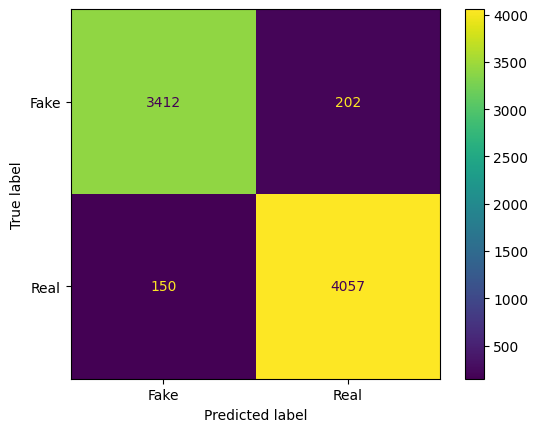

In [ ]:
conf_matrix(Naive)

In [ ]:
class_report(Naive)

              precision    recall  f1-score   support

        Fake       0.96      0.94      0.95      3614
        Real       0.95      0.96      0.96      4207

    accuracy                           0.95      7821
   macro avg       0.96      0.95      0.95      7821
weighted avg       0.96      0.95      0.95      7821



# Decision Trees

In [ ]:
# final model
tree_final_model=DecisionTreeClassifier(max_depth=5, min_samples_split=5)
tree_final_model.fit(X_train,y_train)
tree_training_acc = tree_final_model.score(X_train,y_train)
tree_testing_acc = tree_final_model.score(X_test,y_test)
print(f"Training accuracy of DesicionTreeClassifier is {tree_training_acc}")
print(f"testing accuracy of DesicionTreeClassifier is {tree_testing_acc}")

Training accuracy of DesicionTreeClassifier is 0.9972190257000384
testing accuracy of DesicionTreeClassifier is 0.9975706431402634


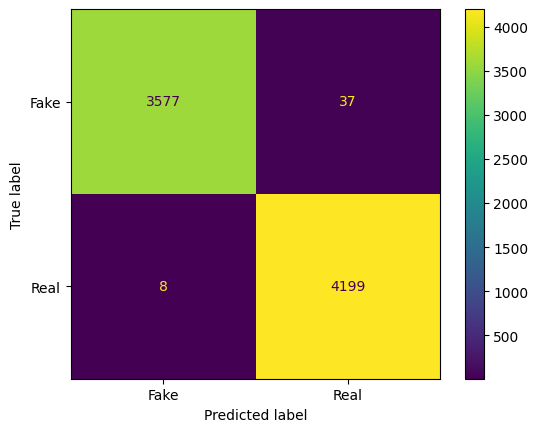

In [ ]:
conf_matrix(tree_final_model)

In [ ]:
class_report(tree_final_model)

              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      3614
        Real       0.99      1.00      0.99      4207

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier with regularization
tree_final_model = DecisionTreeClassifier()

# Perform cross-validation with 5 folds
cv_scores_train = cross_val_score(tree_final_model, X_train, y_train, cv=10)
cv_scores_test = cross_val_score(tree_final_model, X_test, y_test, cv=10)

# Print the cross-validation scores
for fold, score in enumerate(cv_scores_train, start=1):
    print(f"Cross-validation score for fold {fold}: {score:.4f}")

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score_train = cv_scores_train.mean()
std_cv_score_train = cv_scores_train.std()

print(f"Mean cross-validation score: {mean_cv_score_train:.4f}")
print(f"Standard deviation of cross-validation scores: {std_cv_score_train:.4f}")


# Print the cross-validation scores
for fold, score in enumerate(cv_scores_test, start=1):
    print(f"Cross-validation score for fold {fold}: {score:.4f}")





mean_cv_score_test = cv_scores_test.mean()
std_cv_scores_test = cv_scores_test.std()


print(f"Mean cross-validation score: {mean_cv_score_test:.4f}")
print(f"Standard deviation of cross-validation scores: {std_cv_scores_test:.4f}")


Cross-validation score for fold 1: 0.9936
Cross-validation score for fold 2: 0.9955
Cross-validation score for fold 3: 0.9965
Cross-validation score for fold 4: 0.9952
Cross-validation score for fold 5: 0.9952
Cross-validation score for fold 6: 0.9949
Cross-validation score for fold 7: 0.9958
Cross-validation score for fold 8: 0.9936
Cross-validation score for fold 9: 0.9952
Cross-validation score for fold 10: 0.9949
Mean cross-validation score: 0.9950
Standard deviation of cross-validation scores: 0.0008
Cross-validation score for fold 1: 0.9974
Cross-validation score for fold 2: 0.9962
Cross-validation score for fold 3: 0.9974
Cross-validation score for fold 4: 0.9949
Cross-validation score for fold 5: 0.9936
Cross-validation score for fold 6: 0.9974
Cross-validation score for fold 7: 0.9936
Cross-validation score for fold 8: 0.9936
Cross-validation score for fold 9: 0.9936
Cross-validation score for fold 10: 0.9962
Mean cross-validation score: 0.9954
Standard deviation of cross-vali

cross-val +regularization

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier with regularization
tree_final_model = DecisionTreeClassifier(max_depth=1, min_samples_split=2)

# Perform cross-validation with 5 folds
cv_scores_train = cross_val_score(tree_final_model, X_train, y_train, cv=15)
cv_scores_test = cross_val_score(tree_final_model, X_test, y_test, cv=15)

# Print the cross-validation scores
for fold, score in enumerate(cv_scores_train, start=1):
    print(f"Cross-validation score for fold {fold}: {score:.4f}")

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score_train = cv_scores_train.mean()
std_cv_score_train = cv_scores_train.std()

print(f"Mean cross-validation score: {mean_cv_score_train:.4f}")
print(f"Standard deviation of cross-validation scores: {std_cv_score_train:.4f}")


# Print the cross-validation scores
for fold, score in enumerate(cv_scores_test, start=1):
    print(f"Cross-validation score for fold {fold}: {score:.4f}")





mean_cv_score_test = cv_scores_test.mean()
std_cv_scores_test = cv_scores_test.std()


print(f"Mean cross-validation score: {mean_cv_score_test:.4f}")
print(f"Standard deviation of cross-validation scores: {std_cv_scores_test:.4f}")

Cross-validation score for fold 1: 0.9933
Cross-validation score for fold 2: 0.9919
Cross-validation score for fold 3: 0.9928
Cross-validation score for fold 4: 0.9947
Cross-validation score for fold 5: 0.9938
Cross-validation score for fold 6: 0.9957
Cross-validation score for fold 7: 0.9928
Cross-validation score for fold 8: 0.9914
Cross-validation score for fold 9: 0.9947
Cross-validation score for fold 10: 0.9933
Cross-validation score for fold 11: 0.9909
Cross-validation score for fold 12: 0.9952
Cross-validation score for fold 13: 0.9938
Cross-validation score for fold 14: 0.9928
Cross-validation score for fold 15: 0.9952
Mean cross-validation score: 0.9935
Standard deviation of cross-validation scores: 0.0014
Cross-validation score for fold 1: 0.9962
Cross-validation score for fold 2: 0.9962
Cross-validation score for fold 3: 0.9904
Cross-validation score for fold 4: 0.9981
Cross-validation score for fold 5: 0.9943
Cross-validation score for fold 6: 0.9885
Cross-validation score

Regularization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Decision Tree classifier
tree_model = DecisionTreeClassifier()

# Create GridSearchCV object with cross-validation
grid_search = GridSearchCV(tree_model, param_grid, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model using the best parameters
best_tree_model = grid_search.best_estimator_
training_acc = best_tree_model.score(X_train, y_train)
testing_acc = best_tree_model.score(X_test, y_test)

print(f"Training accuracy: {training_acc:.4f}")
print(f"Testing accuracy: {testing_acc:.4f}")


Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training accuracy: 0.9972
Testing accuracy: 0.9972


In [ ]:
for i in np.arange(1,30,1):
  print(i)
  train(DecisionTreeClassifier(max_depth=i), 'DT')


1
Training accuracy of DT is 0.9935430251885948
testing accuracy of DT is 0.9942462600690449
2
Training accuracy of DT is 0.9954929037207518
testing accuracy of DT is 0.9959084516046541
3
Training accuracy of DT is 0.9963239994885564
testing accuracy of DT is 0.9969313387034906
4
Training accuracy of DT is 0.9966756169287815
testing accuracy of DT is 0.9970591995908452
5
Training accuracy of DT is 0.9972190257000384
testing accuracy of DT is 0.9974427822529088
6
Training accuracy of DT is 0.9973468865873929
testing accuracy of DT is 0.9973149213655543
7
Training accuracy of DT is 0.9976345735839407
testing accuracy of DT is 0.9978263649149726
8
Training accuracy of DT is 0.9977943996931339
testing accuracy of DT is 0.997698504027618
9
Training accuracy of DT is 0.9983378084643908
testing accuracy of DT is 0.9980820866896817
10
Training accuracy of DT is 0.9986574606827772
testing accuracy of DT is 0.9968034778161361
11
Training accuracy of DT is 0.998849252013809
testing accuracy of DT

# SVM

In [ ]:
svc_model = SVC(probability=True)


In [ ]:
train(svc_model, 'SVM')


Training accuracy of SVM is 0.9993606955632273
testing accuracy of SVM is 0.9936069556322721


In [ ]:
conf_matrix(svc_model)

# Voting Classifier(SVM, NB, DT)

In [ ]:
VotingClassifiers = VotingClassifier(estimators=[('MultinomialNB',Naive), ('Decision Tree', tree_final_model),('SVM', svc_model)], voting = 'soft')
VotingClassifiers.fit(X_train, y_train)

In [ ]:
VotingClassifiers.score(X_train,y_train),

In [ ]:
VotingClassifiers.score(X_test,y_test)


# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
AdaBoost = AdaBoostClassifier(base_estimator = VotingClassifiers,n_estimators=1,learning_rate=0.1,random_state=1)
AdaBoost.fit(X_train, y_train)
print('Training score:',AdaBoost.score(X_train, y_train))
print('Testing score:',AdaBoost.score(X_test,y_test))

# Gradient Boosting

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(learning_rate= 0.1,
                max_depth=130, n_estimators=50,random_state=8)
model3.fit(X_train,y_train)
print('Training score:',model3.score(X_train,y_train))
print('Testing score:',model3.score(X_test,y_test))

Training score: 1.0
Testing score: 0.9969313387034906


# Bagging Classifier- using DT

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(estimator=tree_final_model)

# Fit the bagging classifier on the training data

bagging_model.fit(X_train, y_train)

# Predict using the bagging classifier
bagging_predictions = bagging_model.predict(X_test)

# Evaluate the bagging classifier
bagging_acc = accuracy_score(y_test, bagging_predictions)
print(f"Testing accuracy of BaggingClassifier is {bagging_acc}")

Testing accuracy of BaggingClassifier is 0.9942462600690449


# Bagging Classifier - using Voting Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=VotingClassifiers, n_estimators=10, random_state=42)

# Fit the bagging classifier on the training data
bagging_model.fit(X_train, y_train)

# Predict using the bagging classifier
bagging_predictions = bagging_model.predict(X_test)

# Evaluate the bagging classifier
bagging_acc = accuracy_score(y_test, bagging_predictions)
print(f"Testing accuracy of BaggingClassifier is {bagging_acc}")